In [41]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [42]:
include("src/NN_Extender.jl")

Main.NN_Extender

In [43]:
NN_Extender.main("methanol-CG-NN.bson")

///////////////////////////////////////////////////////////////////////////////
                                Extender
///////////////////////////////////////////////////////////////////////////////
    
Network would be changed from:
["identity", "relu", "relu", "identity"]
[8, 20, 20, 20, 1]
To:
["identity", "relu", "relu", "identity"]
[12, 30, 30, 30, 1]


In [44]:
BSON.@load "methanol-CG-NN.bson" model
BSON.@load "output_model.bson" output_model

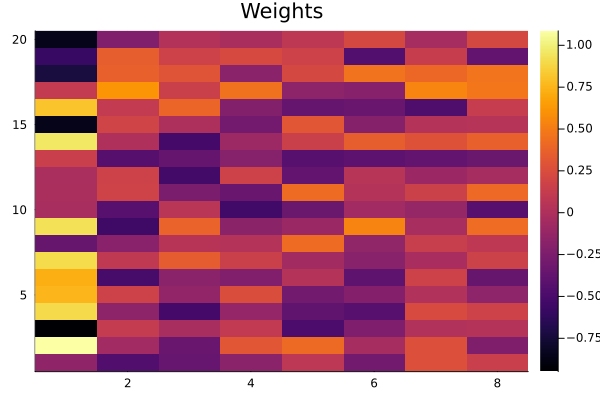

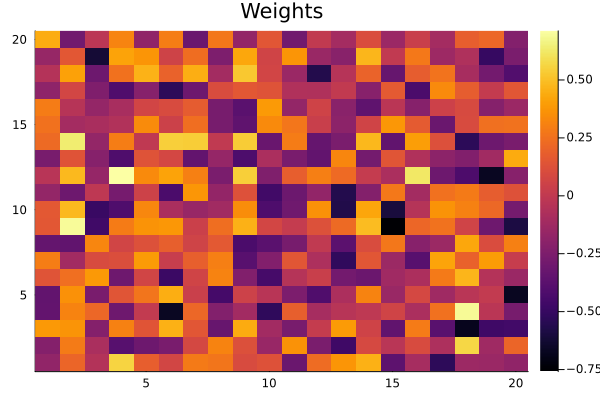

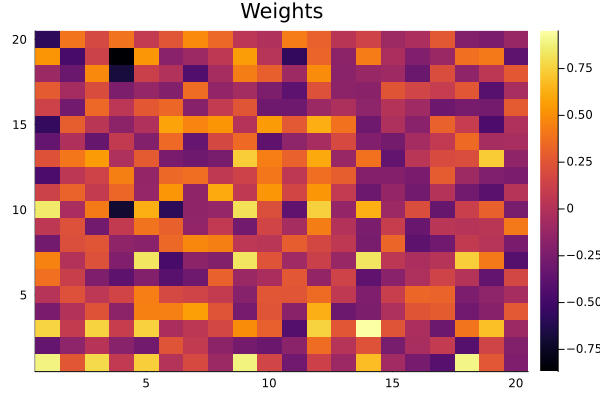

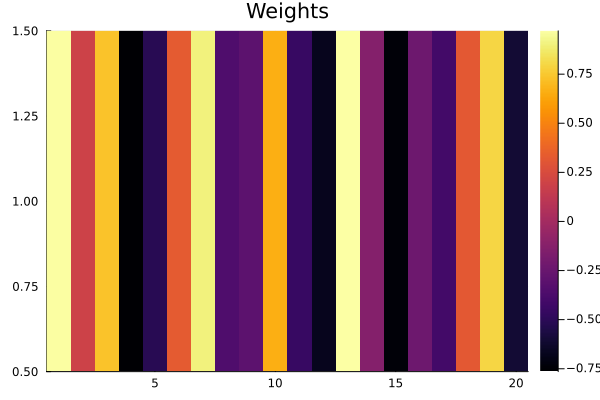

In [45]:
NN_Extender.plot_model_parameters(model)

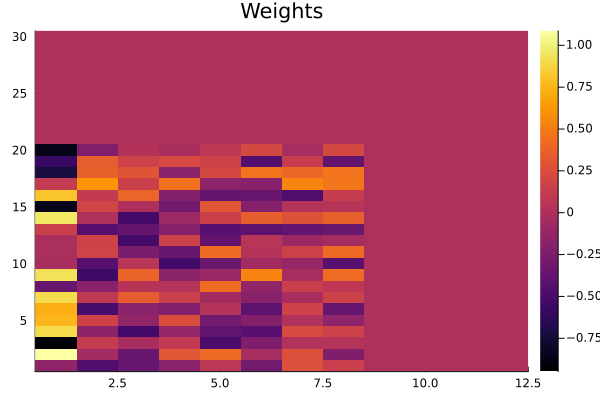

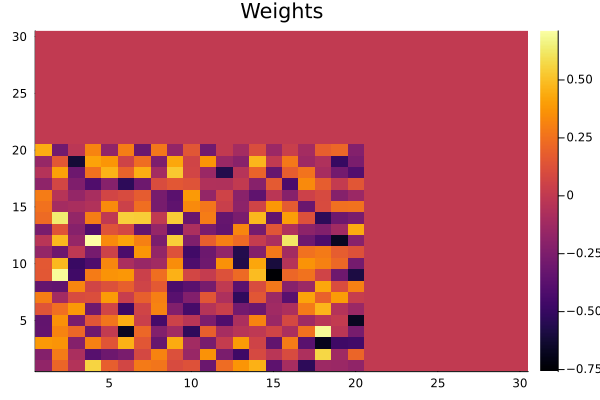

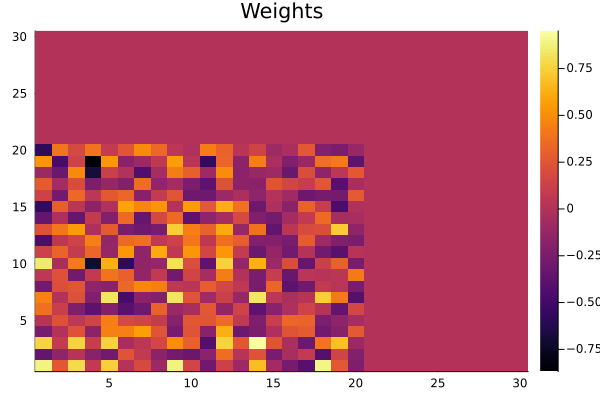

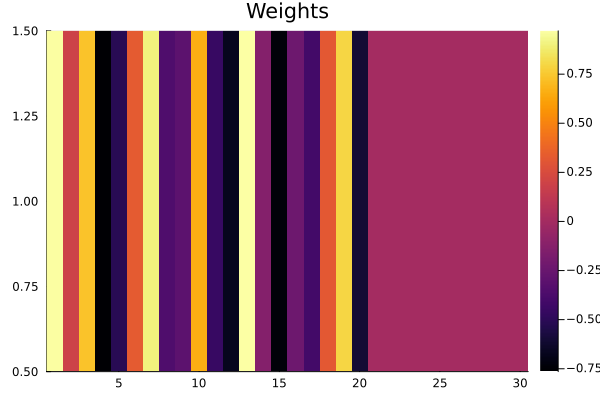

In [46]:
NN_Extender.plot_model_parameters(output_model)

# Testing

In [47]:
mul = 1
n1 = size(model.layers[1].weight)[2]
n2 = size(output_model.layers[1].weight)[2]


for i in 1:1000
    input_vector1 = rand(n1) .* mul
    v_2 = rand(n2 - n1) .* mul
    input_vector2 = vcat(input_vector1, v_2)
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) > 0.00000001
        println("❌ Failed test!")
        println("Input model result: $(result1[1])")
        println("Output model result: $(result2[1])")
        println("Difference: $(abs(result1[1] - result2[1]))")
    end
    mul *= -1
end


In [48]:
# One test
input_vector1 = rand(n1) .* mul
v_2 = rand(n2 - n1) .* mul
input_vector2 = vcat(input_vector1, v_2)
result1 = model(input_vector1)
result2 = output_model(input_vector2)
println("Input model result: $(result1[1])")
println("Output model result: $(result2[1])")

Input model result: -9.939460587607078
Output model result: -9.939460587607078


In [49]:
model

Chain(
  Dense(8 => 20; bias=false),           # 160 parameters
  Dense(20 => 20, relu; bias=false),    # 400 parameters
  Dense(20 => 20, relu; bias=false),    # 400 parameters
  Dense(20 => 1; bias=false),           # 20 parameters
)                   # Total: 4 arrays, 980 parameters, 8.000 KiB.

In [50]:
output_model

Chain(
  Dense(12 => 30; bias=false),          # 360 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_190 parameters, 17.453 KiB.